# Задача 12
Предсказать сорт винограда из которого сделано вино, используя [результаты химических анализов](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data), c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.

In [52]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, metrics
from matplotlib import pyplot as plt

%matplotlib inline

In [53]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 18

In [54]:
wines = pd.read_csv('/Users/pigunther/workspace/GitHub/StartCode/Basimova2018Problem12/wine_data 2.csv')
wines.head()
y = wines['Type']
X = wines.drop('Type', axis=1)


Разделяем на тестовую и тренеровочную, пусть тестовая - 33%

In [55]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=50)
max_neigbors = int(len(X_train)/2)

Будем решать задачу для трех метрик
1. евклидова
2. чебышева
3. минковского с параметром = 5

В силу небольшого количества данных ограничем количество соседей половиной тренировочной выборки (где-то 60 соседей)

In [56]:
metricas = ["euclidean", "chebyshev", "minkowski"]
metricas_params=["", "", " 5"]
mistakes = [[],[],[]]
for i in range(3):
    for neighbors in range(3, max_neigbors):
        if (i == 2):
            classifier = KNeighborsClassifier(n_neighbors=neighbors, metric=metricas[i], p=int(metricas_params[i]))
        else:
            classifier = KNeighborsClassifier(n_neighbors=neighbors, metric=metricas[i])
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        mistakes[i].append((y_pred != y_test).sum())

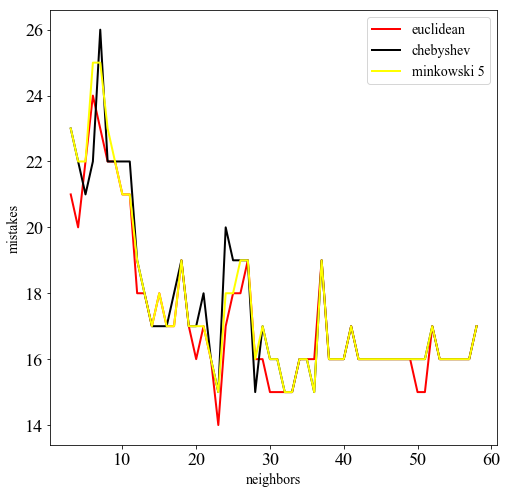

In [57]:
plt.figure(figsize=(8, 8))
colors = ['red', 'black', 'yellow']
for i in range(3): 
    plt.plot(range(3, max_neigbors), mistakes[i], color=colors[i], label=metricas[i]+metricas_params[i])
plt.xlabel('neighbors', fontsize=14)
plt.ylabel('mistakes', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()

Видим, что минимум для всех метрик достигается при k ~ 23

# Теперь ошибки

Для (например) евклидовой метрики строим график зависимости стандартного отклонения ошибки от размера выборки на "train data" и "test data"

In [83]:
opt_neigbors_number = 27
std_mistake = []
mistake = []
test_sizes = np.linspace(0.1, 0.8, 30)
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=50)
    classifier = KNeighborsClassifier(n_neighbors=opt_neigbors_number, metric=metricas[0])
    classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    std_mistake.append(np.std(y_pred != y_test))
    mistake.append((y_pred != y_test).sum())

Text(0,0.5,'std mistakes')

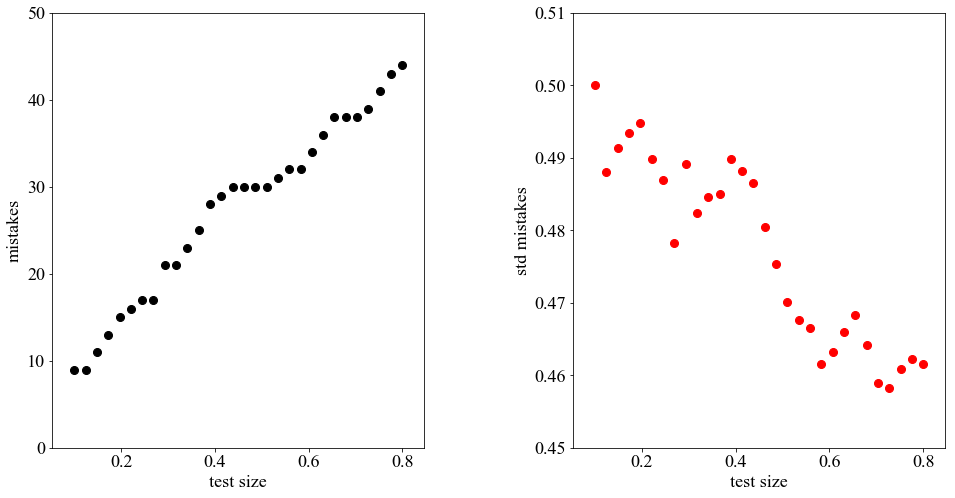

In [84]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.4)
ax1.scatter(test_sizes, mistake, color='black')
ax1.set_ylim(0, 50)

ax1.set_xlabel('test size')
ax1.set_ylabel('mistakes')
ax2.scatter(test_sizes, std_mistake, color='red')
ax2.set_ylim(0.45, 0.51)
ax2.set_xlabel('test size')
ax2.set_ylabel('std mistakes')